In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.special import expit, logit

%config InlineBackend.figure_format = "retina"

plt.rcParams["figure.figsize"] = (10, 6)

In [2]:
datapath = Path("MDataFiles_Stage1/")

# Data

## Basics

In [3]:
teams = pd.read_csv(datapath / "MTeams.csv")
teams

,TeamID,TeamName,FirstD1Season,LastD1Season
0,1101,Abilene Chr,2014,2022
1,1102,Air Force,1985,2022
2,1103,Akron,1985,2022
3,1104,Alabama,1985,2022
4,1105,Alabama A&M,2000,2022
...,...,...,...,...
367,1468,Bellarmine,2021,2022
368,1469,Dixie St,2021,2022
369,1470,Tarleton St,2021,2022
370,1471,UC San Diego,2021,2022


In [4]:
seasons = pd.read_csv(datapath / "MSeasons.csv")
seasons

,Season,DayZero,RegionW,RegionX,RegionY,RegionZ
0,1985,1984-10-29 00:00:00,East,West,Midwest,Southeast
1,1986,1985-10-28 00:00:00,East,Midwest,Southeast,West
2,1987,1986-10-27 00:00:00,East,Southeast,Midwest,West
3,1988,1987-11-02 00:00:00,East,Midwest,Southeast,West
4,1989,1988-10-31 00:00:00,East,West,Midwest,Southeast
5,1990,1989-10-30 00:00:00,East,Midwest,Southeast,West
6,1991,1990-10-29 00:00:00,East,Southeast,Midwest,West
7,1992,1991-11-04 00:00:00,East,West,Midwest,Southeast
8,1993,1992-11-02 00:00:00,East,Midwest,Southeast,West
9,1994,1993-11-01 00:00:00,East,Southeast,Midwest,West


In [5]:
seeds = pd.read_csv(datapath / "MNCAATourneySeeds.csv")
seeds

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2349,2021,Z12,1457
2350,2021,Z13,1317
2351,2021,Z14,1159
2352,2021,Z15,1331


In [6]:
regseason = pd.read_csv(datapath / "MRegularSeasonCompactResults.csv")
regseason

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,20,1228,81,1328,64,N,0
1,1985,25,1106,77,1354,70,H,0
2,1985,25,1112,63,1223,56,H,0
3,1985,25,1165,70,1432,54,H,0
4,1985,25,1192,86,1447,74,H,0
...,...,...,...,...,...,...,...,...
174466,2022,98,1400,79,1242,76,H,0
174467,2022,98,1411,66,1126,63,A,0
174468,2022,98,1422,68,1441,49,A,0
174469,2022,98,1438,69,1181,68,A,0


In [7]:
regseason.WLoc.value_counts()

H    103419
A     53460
N     17592
Name: WLoc, dtype: int64

In [8]:
regseason.DayNum.describe()

count    174471.000000
mean         74.056049
std          33.821333
min           0.000000
25%          47.000000
50%          76.000000
75%         103.000000
max         132.000000
Name: DayNum, dtype: float64

In [9]:
tourney = pd.read_csv(datapath / "MNCAATourneyCompactResults.csv")
tourney

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2312,2021,148,1211,85,1425,66,N,0
2313,2021,148,1417,51,1276,49,N,0
2314,2021,152,1124,78,1222,59,N,0
2315,2021,152,1211,93,1417,90,N,1


In [10]:
tourney.DayNum.value_counts().sort_index()

134     28
135     18
136    564
137    576
138    295
139    288
140      8
143    140
144    140
145     74
146     74
147      2
148      2
152     72
154     36
Name: DayNum, dtype: int64

In [11]:
sample_sub = pd.read_csv(datapath / "MSampleSubmissionStage1.csv")
sample_sub

,ID,Pred
0,2016_1112_1114,0.5
1,2016_1112_1122,0.5
2,2016_1112_1124,0.5
3,2016_1112_1138,0.5
4,2016_1112_1139,0.5
...,...,...
11385,2021_1452_1457,0.5
11386,2021_1452_1458,0.5
11387,2021_1455_1457,0.5
11388,2021_1455_1458,0.5


## Team box scores

In [12]:
boxreg = pd.read_csv(datapath / "MRegularSeasonDetailedResults.csv")
boxreg

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11


In [13]:
boxtourney = pd.read_csv(datapath / "MNCAATourneyDetailedResults.csv")
boxtourney

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,134,1421,92,1411,84,N,1,32,69,...,31,14,31,17,28,16,15,5,0,22
1,2003,136,1112,80,1436,51,N,0,31,66,...,16,7,7,8,26,12,17,10,3,15
2,2003,136,1113,84,1272,71,N,0,31,59,...,28,14,21,20,22,11,12,2,5,18
3,2003,136,1141,79,1166,73,N,0,29,53,...,17,12,17,14,17,20,21,6,6,21
4,2003,136,1143,76,1301,74,N,1,27,64,...,21,15,20,10,26,16,14,5,8,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1176,2021,148,1211,85,1425,66,N,0,33,66,...,15,14,19,7,20,9,9,7,0,13
1177,2021,148,1417,51,1276,49,N,0,21,54,...,11,6,11,8,24,12,14,5,3,11
1178,2021,152,1124,78,1222,59,N,0,29,55,...,19,11,16,13,12,10,10,4,5,10
1179,2021,152,1211,93,1417,90,N,1,37,63,...,17,14,21,7,24,21,9,4,1,16


## Public rankings

>  The final pre-tournament rankings each year have a RankingDayNum of 133

In [14]:
massey = pd.read_csv(datapath / "MMasseyOrdinals.csv")
massey

,Season,RankingDayNum,SystemName,TeamID,OrdinalRank
0,2003,35,SEL,1102,159
1,2003,35,SEL,1103,229
2,2003,35,SEL,1104,12
3,2003,35,SEL,1105,314
4,2003,35,SEL,1106,260
...,...,...,...,...,...
4521715,2022,100,WOL,1468,183
4521716,2022,100,WOL,1469,259
4521717,2022,100,WOL,1470,209
4521718,2022,100,WOL,1471,270


## Geography

In [15]:
datapath = Path("MDataFiles_Stage1/")

cities = pd.read_csv(datapath / "Cities.csv")
cities

,CityID,City,State
0,4001,Abilene,TX
1,4002,Akron,OH
2,4003,Albany,NY
3,4004,Albuquerque,NM
4,4005,Allentown,PA
...,...,...,...
458,4481,San Juan Capistrano,CA
459,4482,St. Paul,MN
460,4483,Canyon,TX
461,4484,Naples,FL


In [16]:
game_cities = pd.read_csv(datapath / "MGameCities.csv")
game_cities

,Season,DayNum,WTeamID,LTeamID,CRType,CityID
0,2010,7,1143,1293,Regular,4027
1,2010,7,1314,1198,Regular,4061
2,2010,7,1326,1108,Regular,4080
3,2010,7,1393,1107,Regular,4340
4,2010,9,1143,1178,Regular,4027
...,...,...,...,...,...,...
67841,2022,98,1400,1242,Regular,4020
67842,2022,98,1411,1126,Regular,4092
67843,2022,98,1422,1441,Regular,4087
67844,2022,98,1438,1181,Regular,4101


## Supplements

In [17]:
coaches = pd.read_csv(datapath / "MTeamCoaches.csv")
coaches

,Season,TeamID,FirstDayNum,LastDayNum,CoachName
0,1985,1102,0,154,reggie_minton
1,1985,1103,0,154,bob_huggins
2,1985,1104,0,154,wimp_sanderson
3,1985,1106,0,154,james_oliver
4,1985,1108,0,154,davey_whitney
...,...,...,...,...,...
12419,2022,1468,0,98,scott_davenport
12420,2022,1469,0,98,jon_judkins
12421,2022,1470,0,98,billy_gillispie
12422,2022,1471,0,98,eric_olen


In [18]:
conferences = pd.read_csv(datapath / "Conferences.csv")
conferences

,ConfAbbrev,Description
0,a_sun,Atlantic Sun Conference
1,a_ten,Atlantic 10 Conference
2,aac,American Athletic Conference
3,acc,Atlantic Coast Conference
4,aec,America East Conference
5,asc,American South Conference
6,awc,American West Conference
7,big_east,Big East Conference
8,big_eight,Big Eight Conference
9,big_sky,Big Sky Conference


In [19]:
team_confs = pd.read_csv(datapath / "MTeamConferences.csv")
team_confs

,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac
...,...,...,...
12294,2022,1468,a_sun
12295,2022,1469,wac
12296,2022,1470,wac
12297,2022,1471,big_west


> this is NOT a new listing of games; these games are already present within the MRegularSeasonCompactResults and MRegularSeasonDetailedResults files. So this file simply helps you to identify which of the "regular season" games since the 2001 season were actually conference tournament games, in case that is useful information.

In [20]:
conference_tourney_games = pd.read_csv(datapath / "MConferenceTourneyGames.csv")
conference_tourney_games

,Season,ConfAbbrev,DayNum,WTeamID,LTeamID
0,2001,a_sun,121,1194,1144
1,2001,a_sun,121,1416,1240
2,2001,a_sun,122,1209,1194
3,2001,a_sun,122,1359,1239
4,2001,a_sun,122,1391,1273
...,...,...,...,...,...
5578,2021,wcc,124,1337,1365
5579,2021,wcc,124,1388,1258
5580,2021,wcc,126,1140,1337
5581,2021,wcc,126,1211,1388


In [21]:
slots = pd.read_csv(datapath / "MNCAATourneySlots.csv")
slots = slots.set_index(["Season", "Slot"]).sort_index()
slots

StrongSeed WeakSeed
Season Slot                    
1985   R1W1        W01      W16
       R1W2        W02      W15
       R1W3        W03      W14
       R1W4        W04      W13
       R1W5        W05      W12
...                ...      ...
2021   R6CH       R5WX     R5YZ
       W11        W11a     W11b
       W16        W16a     W16b
       X11        X11a     X11b
       X16        X16a     X16b

[2318 rows x 2 columns]

In [22]:
round_slots = pd.read_csv(datapath / "MNCAATourneySeedRoundSlots.csv")
round_slots = (
    round_slots.rename(dict(GameSlot="Slot"), axis=1)
    .set_index(["Slot", "Seed"])
    .sort_index()
)
round_slots

GameRound  EarlyDayNum  LateDayNum
Slot Seed                                    
R1W1 W01           1          136         137
     W16           1          136         137
     W16a          1          136         137
     W16b          1          136         137
R1W2 W02           1          136         137
...              ...          ...         ...
Z14  Z14b          0          134         135
Z15  Z15a          0          134         135
     Z15b          0          134         135
Z16  Z16a          0          134         135
     Z16b          0          134         135

[720 rows x 3 columns]

In [23]:
round_slots.EarlyDayNum.value_counts()

136    112
138    112
143    112
145    112
152    112
154    112
134     48
Name: EarlyDayNum, dtype: int64

# EDA

<AxesSubplot:xlabel='RankingDayNum'>

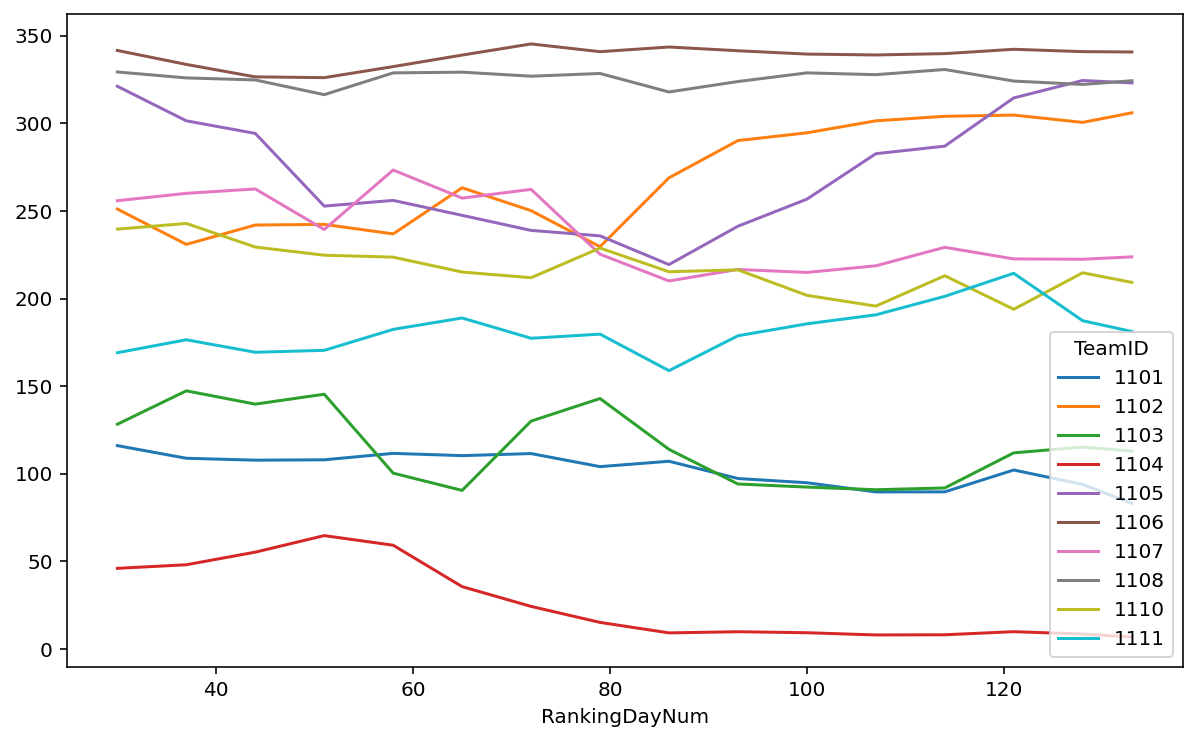

In [24]:
massey.query("Season == 2021").groupby(["RankingDayNum", "TeamID"])[
    "OrdinalRank"
].mean().unstack("TeamID").iloc[:, :10].plot()

# Scoring

In [25]:
def make_row(WTeamID, LTeamID, Season, **kwargs):
    if WTeamID < LTeamID:
        team1 = WTeamID
        team2 = LTeamID
        truth = 1
    else:
        team1 = LTeamID
        team2 = WTeamID
        truth = 0

    return pd.Series(
        {
            **kwargs,
            #             "Season": Season,
            "WTeamID": WTeamID,
            "LTeamID": LTeamID,
            "ID": "_".join([str(Season), str(team1), str(team2)]),
            "truth": truth,
        }
    )


scoring_df = (
    tourney.apply(lambda r: make_row(**r.to_dict()), axis=1)
    .set_index("ID")
    .sort_index()
)
scoring_df

,DayNum,WScore,LScore,WLoc,NumOT,WTeamID,LTeamID,truth
ID,,,,,,,,
1985_1104_1112,137,50,41,N,0,1104,1112,1
1985_1104_1301,144,61,55,N,0,1301,1104,0
1985_1104_1433,139,63,59,N,0,1104,1433,1
1985_1116_1234,136,63,54,N,0,1116,1234,1
1985_1116_1385,138,68,65,N,0,1385,1116,0
...,...,...,...,...,...,...,...,...
2021_1333_1397,137,70,56,N,0,1333,1397,1
2021_1361_1393,137,78,62,N,0,1393,1361,0
2021_1393_1452,139,75,72,N,0,1393,1452,1


In [26]:
submission_ids = sample_sub.ID.str.split("_", expand=True).astype(int)
submission_ids.columns = ["Season", "Team1", "Team2"]
submission_ids = submission_ids.set_index(submission_ids.columns.tolist())

In [27]:
%%time

submission_ids_full = (
    pd.crosstab(teams.TeamID.rename("Team1"), teams.TeamID.rename("Team2"))
    .stack()
    .reset_index()
    .loc[lambda f: f["Team1"].lt(f["Team2"])][["Team1", "Team2"]]
    .set_index(["Team1", "Team2"])
)
submission_ids_full = pd.concat(
    [
        submission_ids_full.assign(Season=s).set_index("Season", append=True)
        for s in seasons["Season"].values
    ]
).reorder_levels(["Season", "Team1", "Team2"])

CPU times: user 252 ms, sys: 20.3 ms, total: 272 ms
Wall time: 271 ms


In [28]:
def logloss(pred, truth):
    return truth * np.log(pred) + (1 - truth) * np.log(1 - pred)


def score(submission, scoring_df):
    loglosses = score_games(submission, scoring_df)
    return -loglosses.mean()


def score_by_season(submission, scoring_df):
    loglosses = score_games(submission, scoring_df)
    return (
        loglosses.reset_index()
        .assign(
            season=lambda f: f["ID"].str.split("_", expand=True).iloc[:, 0].astype(int)
        )
        .groupby("season")
        .mean()
    )


def score_games(submission, scoring_df):
    joined = submission.set_index("ID").join(scoring_df)
    return logloss(joined["Pred"], joined["truth"]).dropna().rename("logloss")

In [29]:
score(sample_sub, scoring_df)

0.6931471805599453

# Bracket building

In [30]:
slots_long = pd.concat(
    [
        slots["StrongSeed"]
        .to_frame("Seed")
        .assign(strength="strong")
        .set_index(["Seed"], append=True),
        slots["WeakSeed"]
        .to_frame("Seed")
        .assign(strength="weak")
        .set_index(["Seed"], append=True),
    ],
).sort_index()
slots_long

strength
Season Slot Seed         
1985   R1W1 W01    strong
            W16      weak
       R1W2 W02    strong
            W15      weak
       R1W3 W03    strong
...                   ...
2021   W16  W16b     weak
       X11  X11a   strong
            X11b     weak
       X16  X16a   strong
            X16b     weak

[4636 rows x 1 columns]

In [31]:
def make_bracket(group):
    group = group.drop("Season", axis=1)
    all_slots = group
    for rnd in range(1, 6):
        rev = 6 - rnd
        all_slots = all_slots.rename(
            dict(Seed="Slot", Slot=f"next_{rev}"), axis=1
        ).merge(
            group,
            left_on="Slot",
            right_on="Slot",
            suffixes=(f"_{rev}", ""),
            how="right",
        )

    bracket = (
        all_slots.rename(
            dict(Slot="next_0", Seed="Seed", strength="strength_0"), axis=1
        )
        .set_index(["Seed"])
        .sort_index(axis=1)
        .sort_index()
    )
    bracket.columns = bracket.columns.map(lambda name: tuple(name.split("_")))

    bracket.columns.names = ["column", "rnd"]

    # getting rid of slots that are not seeds
    bracket = bracket.query("Seed.str.len() < 4", engine="python").stack("rnd")
    return bracket


all_brackets = (
    slots_long.reset_index()
    .groupby("Season")
    .apply(make_bracket)
    .rename(dict(next="Slot"), axis=1)
    .assign(favorite=lambda f: f["strength"].str.contains("strong"))
    .drop("strength", axis=1)
    .join(seeds.set_index(["Season", "Seed"]))
    .convert_dtypes()
    .set_index("TeamID", append=True)
    .swaplevel(2, 3)
)

all_brackets.head(20)

Slot  favorite
Season Seed TeamID rnd                
1985   W01  1207   0    R1W1      True
                   1    R2W1      True
                   2    R3W1      True
                   3    R4W1      True
                   4    R5WX      True
                   5    R6CH      True
       W02  1210   0    R1W2      True
                   1    R2W2      True
                   2    R3W2      True
                   3    R4W1     False
                   4    R5WX      True
                   5    R6CH      True
       W03  1228   0    R1W3      True
                   1    R2W3      True
                   2    R3W2     False
                   3    R4W1     False
                   4    R5WX      True
                   5    R6CH      True
       W04  1260   0    R1W4      True
                   1    R2W4      True

In [32]:
(
    all_brackets.set_index("Slot", append=True)
    .swaplevel(2, 4)
    .swaplevel(1, 2)
    .sort_index()
)

favorite
Season Slot Seed rnd TeamID          
1985   R1W1 W01  0   1207        True
            W16  0   1250       False
       R1W2 W02  0   1210        True
            W15  0   1273       False
       R1W3 W03  0   1228        True
...                               ...
2021   R6CH Z12  5   1457       False
            Z13  5   1317       False
            Z14  5   1159       False
            Z15  5   1331       False
            Z16  5   1216       False

[13824 rows x 1 columns]

In [33]:
submission_ids.join(
    all_brackets.set_index("Slot", append=True)
    .reset_index("TeamID")
    .rename(dict(TeamID="Team1"), axis=1)
    .set_index("Team1", append=True)
    .iloc[:, 0]
    .rename("favorite_1")
).join(
    all_brackets.set_index("Slot", append=True)
    .reset_index("TeamID")
    .rename(dict(TeamID="Team2"), axis=1)
    .set_index("Team2", append=True)
    .iloc[:, 0]
    .rename("favorite_2")
)

favorite_1  favorite_2
Season Team2 Seed rnd Slot Team1                        
2016   1114  Y06  0   R1Y6 1112         True        <NA>
                  1   R2Y3 1112        False        <NA>
                  2   R3Y2 1112        False        <NA>
                  3   R4Y1 1112        False        <NA>
                  4   R5YZ 1112         True        <NA>
...                                      ...         ...
2021   1458  NaN  NaN NaN  1291         <NA>        <NA>
                           1313         <NA>        <NA>
                           1411         <NA>        <NA>
                           1417         <NA>        <NA>
                           1455         <NA>        <NA>

[62275 rows x 2 columns]

In [34]:
%%time

recent_brackets_unstacked = (
    all_brackets.set_index("Slot", append=True)
    .swaplevel(2, 4)
    .swaplevel(1, 2)
    .sort_index()
    .loc[2016:2021]
    .reset_index("Seed", drop=True)
    .query("TeamID == TeamID")
    .iloc[:, 0]
    .unstack("TeamID")
    .sort_index()
)

fixtures = []
for _, row in submission_ids.reset_index().iterrows():
    season = row.get("Season")
    team1 = row.get("Team1")
    team2 = row.get("Team2")
    try:
        relevant = (
            recent_brackets_unstacked.loc[season]
            .loc[:, [team1, team2]]
            .dropna(how="any", subset=[team1, team2])
            .head(1)
        )

        fixtures.append(
            relevant.assign(Season=season)
            .set_index("Season", append=True)
            .assign(
                ID="_".join(map(str, [season, team1, team2])),
                team1_favourite=relevant[team1],
            )
            .drop([team1, team2], axis=1)
        )

    except:
        ...

len(fixtures)

CPU times: user 44.9 s, sys: 54 ms, total: 45 s
Wall time: 44.9 s


9831

In [35]:
fixs = pd.concat(fixtures).swaplevel(0, 2).sort_index().rename_axis(None, axis=1)

fixs

ID  team1_favourite
Season rnd Slot                                 
2016   0   R1W2  2016_1451_1462            False
           R1W3  2016_1372_1452            False
           R1W4  2016_1246_1392             True
           R1W5  2016_1151_1231            False
           R1W7  2016_1338_1458            False
...                         ...              ...
2021   5   R6CH  2021_1437_1438            False
           R6CH  2021_1438_1439             True
           R6CH  2021_1438_1452             True
           R6CH  2021_1438_1457             True
           R6CH  2021_1438_1458             True

[8850 rows x 2 columns]

# Baseline: mean rank + bradley-terry

In [36]:
last_ranks_multi = (
    massey.query("RankingDayNum == 133")
    .groupby(["TeamID", "Season"])["OrdinalRank"]
    .agg(["mean", "median"])
)
last_ranks = last_ranks_multi["mean"]
last_ranks

TeamID  Season
1101    2014      338.163636
        2015      330.586207
        2016      308.827586
        2017      296.366197
        2018      259.209677
                     ...    
1467    2021      239.823529
1468    2021      180.620000
1469    2021      315.142857
1470    2021      254.367347
1471    2021      255.620000
Name: mean, Length: 6180, dtype: float64

In [37]:
from functools import partial


def transform_rank_log(rank1, rank2, a):
    return np.log1p(a * rank2) / (np.log1p(a * rank1) + np.log1p(a * rank2))


transform_log = partial(transform_rank_log, a=1)
transform_log03 = partial(transform_rank_log, a=0.3)
transform_log10 = partial(transform_rank_log, a=0.1)

<AxesSubplot:ylabel='Density'>

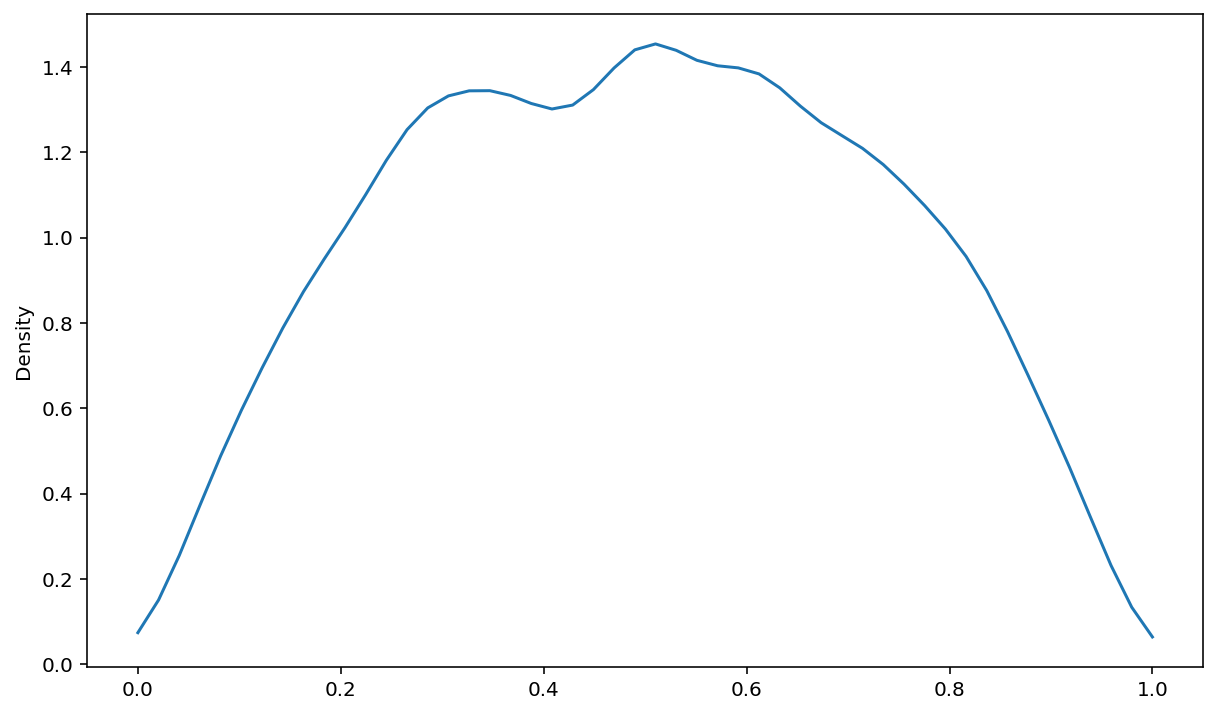

In [38]:
def make_ID(f):
    return (
        f["Season"]
        .astype(str)
        .str.cat([f["Team1"].astype(str), f["Team2"].astype(str)], sep="_")
    )


def bradley_terry(score1, score2):
    return score1 / (score1 + score2)


def join_last_ranks(last_ranks, submission_ids, power=0.75):
    baseline = (
        submission_ids.join(
            last_ranks.rename("rank1")
            .reset_index("TeamID")
            .rename(dict(TeamID="Team1"), axis=1)
            .set_index("Team1", append=True),
            how="inner",
        )
        .join(
            last_ranks.rename("rank2")
            .reset_index("TeamID")
            .rename(dict(TeamID="Team2"), axis=1)
            .set_index("Team2", append=True),
            how="inner",
        )
        .assign(
            Pred=lambda f: bradley_terry(f["rank2"].pow(power), f["rank1"].pow(power))
        )
        .reset_index()
        .assign(ID=lambda f: make_ID(f))
    )
    return baseline


baseline = join_last_ranks(last_ranks_multi["mean"], submission_ids)
baseline_median = join_last_ranks(last_ranks_multi["median"], submission_ids)
baseline["Pred"].plot.kde(ind=np.linspace(0, 1, 50))

In [39]:
score(baseline, scoring_df), score(baseline_median, scoring_df)

(0.5531626732293926, 0.5535908002422016)

In [40]:
baseline[["ID", "Pred"]].sort_values("ID").to_csv(
    "submissions/mean_rank_pow0.75_bradley-terry.csv", index=False
)

In [41]:
baseline_median[["ID", "Pred"]].sort_values("ID").to_csv(
    "submissions/median_rank_pow0.75_bradley-terry.csv", index=False
)

## Baseline + ewma

In [42]:
HALFLIFE = 6

rankings_mean = (
    massey.groupby(["TeamID", "Season", "RankingDayNum"])["OrdinalRank"]
    .mean()
    .unstack("TeamID")
    .sort_index()
)

ewms = rankings_mean.ewm(halflife=HALFLIFE).agg(["mean", "std"]).stack("TeamID")

last_ranks_ewms = ewms.query("RankingDayNum == 133").reset_index(
    "RankingDayNum", drop=True
)

last_rank_exp_mean = last_ranks_ewms["mean"].swaplevel().sort_index()
last_rank_exp_mean

TeamID  Season
1101    2014      333.509499
        2015      321.021854
        2016      316.381988
        2017      291.341722
        2018      254.454543
                     ...    
1467    2021      240.020965
1468    2021      202.589283
1469    2021      311.705517
1470    2021      288.182973
1471    2021      271.059931
Name: mean, Length: 6244, dtype: float64

0.5411156114872393

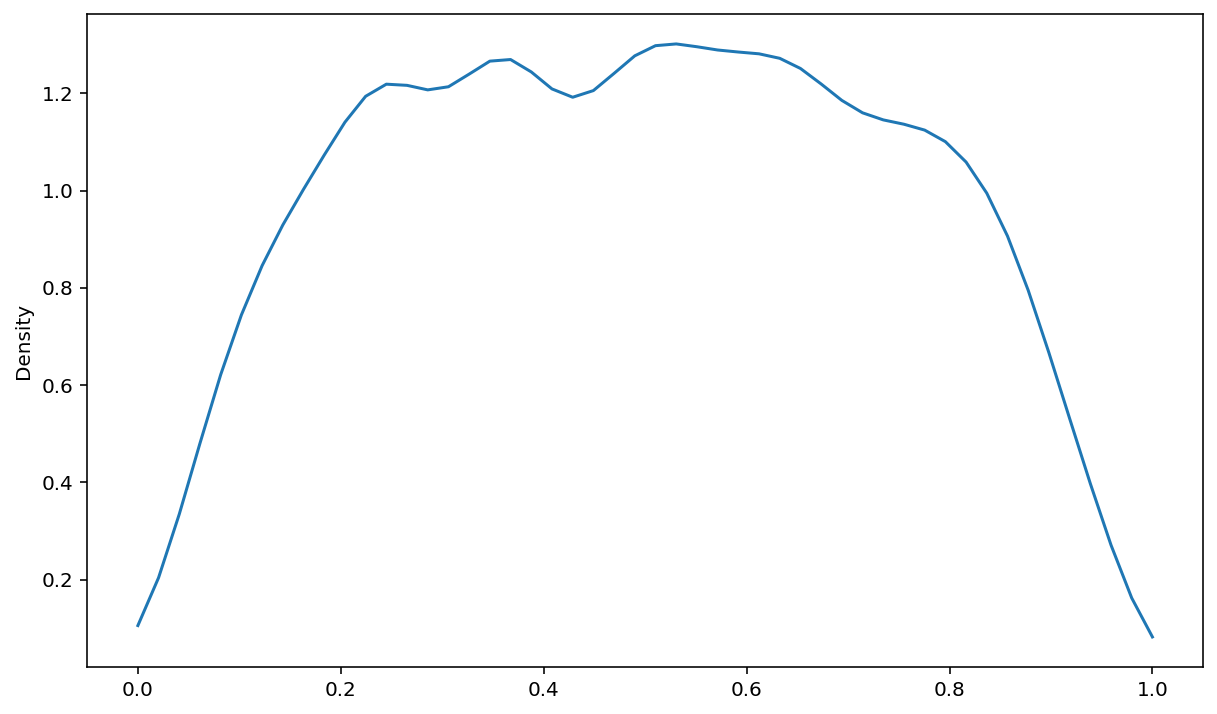

In [43]:
baseline_ewma = join_last_ranks(last_rank_exp_mean, submission_ids, power=0.85)
baseline_ewma["Pred"].plot.kde(ind=np.linspace(0, 1, 50))
score(baseline_ewma, scoring_df)

In [44]:
score_by_season(baseline_ewma, scoring_df)

,logloss
season,
2016,-0.536713
2017,-0.502469
2018,-0.583024
2019,-0.494676
2021,-0.589416


In [45]:
baseline_ewma[["ID", "Pred"]].sort_values("ID").to_csv(
    "submissions/mean_rank_ewma_hl_6_pow0.85_bradley-terry.csv", index=False
)

0.53808


,logloss
season,
2016,-0.530811
2017,-0.511528
2018,-0.576791
2019,-0.490131
2021,-0.581798


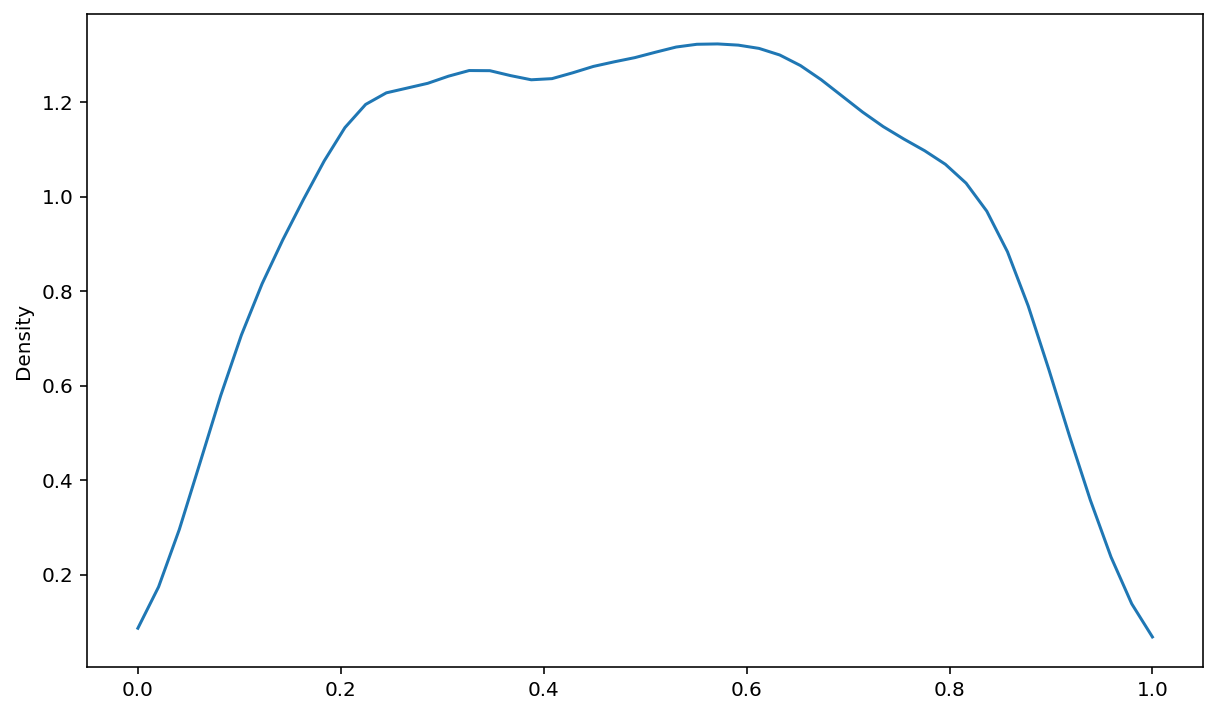

In [46]:
def transform_expit(x, a=1.0, b=0.05):
    return expit(logit(x) * a + b * x)


bl = (
    baseline_ewma.set_index("ID")
    .join(fixs.reset_index("Season", drop=True).reset_index().set_index("ID"))
    .reset_index()
)

power_fav = 0.9

baseline_ewma_favourite = bl.rename(dict(Pred="raw_pred"), axis=1).assign(
    Pred=lambda f: f["raw_pred"].where(
        f["team1_favourite"].isna(),
        f["raw_pred"]
        .pow(power_fav)
        .where(~f["team1_favourite"], 1 - (1 - f["raw_pred"]).pow(power_fav)),
    )
)
baseline_ewma_favourite["Pred"].plot.kde(ind=np.linspace(0, 1, 50))

print(score(baseline_ewma_favourite, scoring_df).round(5))
score_by_season(baseline_ewma_favourite, scoring_df)

In [47]:
baseline_ewma_favourite[["ID", "Pred"]].sort_values("ID").to_csv(
    "submissions/mean_rank_ewma_hl_6_pow0.85_nonfav_pow0.9_bradley-terry.csv",
    index=False,
)

In [48]:
score(baseline_ewma, scoring_df)

0.5411156114872393

# Baseline + ewma + avg rank

In [49]:
def q1(s):
    return s.quantile(0.25)


def q3(s):
    return s.quantile(0.75)


stats = ["mean", "min", "std", q1, q3]

brackets_rank_by_slot = (
    all_brackets.join(last_ranks_ewms["mean"].rename("rank"), how="inner")
    .groupby(["Season", "Slot", "rnd"])["rank"]
    .agg(stats)
)
brackets_rank = (
    all_brackets.set_index("Slot", append=True)
    .join(
        brackets_rank_by_slot,
        how="inner",
    )
    .swaplevel()
)

brackets_rank_stat = dict()

for stat in stats:
    if hasattr(stat, "__call__"):
        stat = stat.__name__
    brackets_rank_stat[stat] = (
        brackets_rank[stat]
        .reset_index("Slot", drop=True)
        .unstack("rnd")
        .shift(1, axis=1)
        .stack()
        .reorder_levels(["Season", "rnd", "TeamID", "Seed"])
        .sort_index()
        .to_frame(stat)
    )
brackets_rank_stat = pd.concat(brackets_rank_stat.values(), axis=1)

brackets_rank_stat

mean        min         std         q1  \
Season rnd TeamID Seed                                                
2003   1   1101   X16    5.839768   5.839768         NaN   5.839768   
           1104   Y10   37.410191  33.670696    5.288445  35.540444   
           1112   Z01   83.085121   1.886494  114.832201  42.485807   
           1113   Z10   33.234968  31.300343    2.735973  32.267656   
           1120   W10   31.167115  21.338438   13.899848  26.252777   
...                           ...        ...         ...        ...   
2021   5   1438   X04   56.106929   2.068100   49.425706  22.491611   
           1439   Z10   65.524593   4.119818   59.606092  24.104383   
           1452   Y03   65.524593   4.119818   59.606092  24.104383   
           1457   Z12   65.524593   4.119818   59.606092  24.104383   
           1458   Z09   65.524593   4.119818   59.606092  24.104383   

                                q3  
Season rnd TeamID Seed              
2003   1   1101   X16     5.839768  
           1104   Y10    39.279939  
           1112   Z01   123.684435  
           1113   Z10    34.202281  
           1120   W10    36.081454  
...                            ...  
2021   5   1438   X04   100.550154  
           1439   Z10    90.045301  
           1452   Y03    90.045301  
           1457   Z12    90.045301  
           1458   Z09    90.045301  

[5760 rows x 5 columns]

In [50]:
fixs_teams = (
    fixs.assign(
        Team1=lambda f: f["ID"].str.split("_", expand=True).iloc[:, 1].astype(int),
        Team2=lambda f: f["ID"].str.split("_", expand=True).iloc[:, 2].astype(int),
    )
    .reset_index("Slot", drop=True)
    .set_index(["Team1", "Team2"], append=True)
)
fixs_teams

ID  team1_favourite
Season rnd Team1 Team2                                 
2016   0   1451  1462   2016_1451_1462            False
           1372  1452   2016_1372_1452            False
           1246  1392   2016_1246_1392             True
           1151  1231   2016_1151_1231            False
           1338  1458   2016_1338_1458            False
...                                ...              ...
2021   5   1437  1438   2021_1437_1438            False
           1438  1439   2021_1438_1439             True
                 1452   2021_1438_1452             True
                 1457   2021_1438_1457             True
                 1458   2021_1438_1458             True

[8850 rows x 2 columns]

In [51]:
brackets_team1 = (
    brackets_rank_stat.reset_index("Seed", drop=True)
    .reset_index("TeamID")
    .rename(dict(TeamID="Team1"), axis=1)
    .set_index("Team1", append=True)
)
brackets_team1.columns = brackets_team1.columns.map(lambda val: str(val) + "_1")

brackets_team2 = (
    brackets_rank_stat.reset_index("Seed", drop=True)
    .reset_index("TeamID")
    .rename(dict(TeamID="Team2"), axis=1)
    .set_index("Team2", append=True)
)
brackets_team2.columns = brackets_team2.columns.map(lambda val: str(val) + "_2")

brackets_rank_stat_by_ID = (
    fixs_teams.join(brackets_team1, rsuffix="_1")
    .join(brackets_team2, rsuffix="_2")
    .reorder_levels(["Season", "Team1", "Team2", "rnd"])
    .sort_index()
)

In [52]:
brackets_rank_stat_by_ID

ID  team1_favourite     mean_1      min_1  \
Season Team1 Team2 rnd                                                          
2016   1112  1114  5    2016_1112_1114            False  63.202245   4.345564   
             1122  3    2016_1112_1122            False  61.635949   4.345564   
             1124  4    2016_1112_1124             True  66.139861   4.345564   
             1138  1    2016_1112_1138            False  15.590578  15.590578   
             1139  5    2016_1112_1139            False  63.202245   4.345564   
...                                ...              ...        ...        ...   
2021   1439  1457  3    2021_1439_1457            False  57.687077  15.297100   
             1458  3    2021_1439_1458            False  57.687077  15.297100   
       1452  1457  4    2021_1452_1457             True  70.335583   9.710883   
             1458  4    2021_1452_1458             True  70.335583   9.710883   
       1457  1458  2    2021_1457_1458            False  57.549255  13.000650   

                            std_1       q1_1        q3_1     mean_2  \
Season Team1 Team2 rnd                                                
2016   1112  1114  5    56.758631  20.278644   83.688454  57.676254   
             1122  3    62.843840  16.696127  108.961725  70.080784   
             1124  4    67.709416  18.232586   82.703317  60.264629   
             1138  1          NaN  15.590578   15.590578  75.025632   
             1139  5    56.758631  20.278644   83.688454  57.676254   
...                           ...        ...         ...        ...   
2021   1439  1457  3    53.417882  25.511551   63.439898  63.740131   
             1458  3    53.417882  25.511551   63.439898  63.740131   
       1452  1457  4    61.749574  24.430267   97.324061  60.713604   
             1458  4    61.749574  24.430267   97.324061  60.713604   
       1457  1458  2    42.348853  25.806464   91.131000  69.931007   

                            min_2      std_2       q1_2        q3_2  
Season Team1 Team2 rnd                                               
2016   1112  1114  5     7.569137  52.147268  21.348725   88.040669  
             1122  3     5.271190  75.801976  35.287232   78.152885  
             1124  4     7.591627  45.498763  26.059682   83.323913  
             1138  1    17.801677  80.926894  46.413654  103.637610  
             1139  5     7.569137  52.147268  21.348725   88.040669  
...                           ...        ...        ...         ...  
2021   1439  1457  3     4.119818  67.699775  19.965537   91.131000  
             1458  3     4.119818  67.699775  19.965537   91.131000  
       1452  1457  4     4.119818  58.993596  23.081042   80.932043  
             1458  4     4.119818  58.993596  23.081042   80.932043  
       1457  1458  2     4.119818  93.801075  17.745329   85.794640  

[9314 rows x 12 columns]

0.5404


,logloss
season,
2016,-0.537346
2017,-0.505402
2018,-0.580978
2019,-0.496508
2021,-0.582253


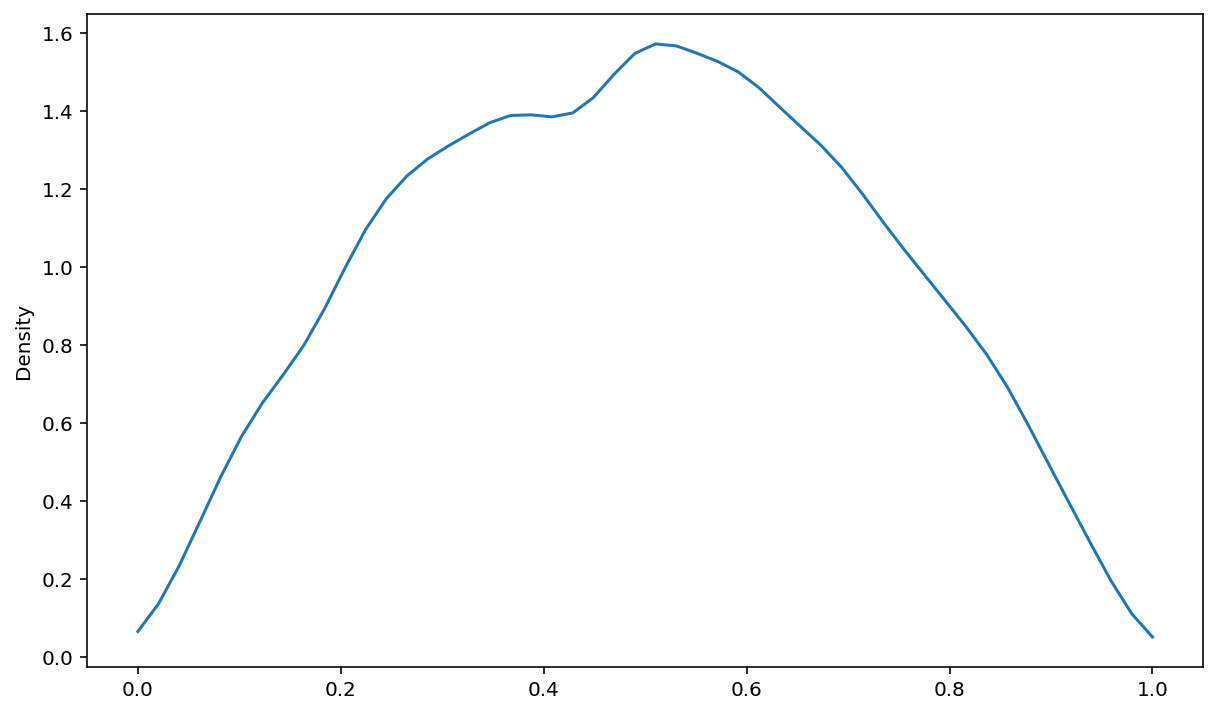

In [53]:
power = 0.9
ewma_and_ranks_beaten = (
    baseline_ewma.merge(
        brackets_rank_stat_by_ID.reset_index().drop(
            ["Season", "Team1", "Team2"], axis=1
        ),
        on="ID",
        how="left",
    )
    .drop_duplicates(subset="ID")
    .assign(
        rank1_adj=lambda f: f["rank1"].clip(0, f[["q1_1", "rank1"]].mean(axis=1)),
        rank2_adj=lambda f: f["rank2"].clip(0, f[["q1_2", "rank2"]].mean(axis=1)),
        old_pred=lambda f: f["Pred"],
    )
    .assign(
        Pred=lambda f: (
            f["rank2_adj"]
            .pow(power)
            .div(f["rank1_adj"].pow(power).add(f["rank2_adj"].pow(power)))
        ).where(~f["q1_1"].isna(), f["Pred"])
    )
)
print(score(ewma_and_ranks_beaten, scoring_df).round(4))
ewma_and_ranks_beaten["Pred"].plot.kde(ind=np.linspace(0, 1, 50))
score_by_season(ewma_and_ranks_beaten, scoring_df).style.background_gradient()

In [54]:
ewma_and_ranks_beaten[["ID", "Pred"]].sort_values("ID").to_csv(
    "submissions/mean_rank_ewma_hl_6_and_ranks_beaten_pow0.9_bradley-terry.csv",
    index=False,
)

# Machine learning

In [55]:
features = (
    regseason.set_index(regseason.columns.difference({"WTeamID", "LTeamID"}).tolist())
    .rename_axis("TeamW", axis=1)
    .stack()
    .rename("TeamID")
    .reset_index()
    .assign(
        win=lambda f: f["TeamW"].str.contains("W"),
        handicap=lambda f: f["WLoc"].map(dict(H=1, A=-1, N=0)),
    )
    .set_index(["Season", "TeamID", "DayNum"])
    .sort_index()[["win", "LScore", "WScore", "NumOT"]]
    .groupby(["Season", "TeamID"])
    .apply(lambda g: g.ewm(halflife=20).mean().tail(1).reset_index(drop=True))
    .reset_index(level=-1, drop=True)
)

features

win     LScore     WScore     NumOT
Season TeamID                                          
1985   1102    0.219797  61.280095  70.033027  0.000000
       1103    0.398293  58.684979  67.586744  0.000000
       1104    0.689313  58.271794  68.825074  0.052694
       1106    0.442057  68.287490  79.221157  0.000000
       1108    0.788362  72.029856  84.450839  0.000000
...                 ...        ...        ...       ...
2022   1468    0.481014  61.769743  74.884610  0.057288
       1469    0.382370  64.697578  81.057088  0.000000
       1470    0.427667  59.938729  71.206714  0.051691
       1471    0.378924  63.485542  75.708171  0.048173
       1472    0.234752  68.577626  82.015403  0.000000

[12299 rows x 4 columns]

In [56]:
boxreg

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11


In [57]:
box1 = (
    boxreg.rename_axis("game_no")
    .reset_index()
    .set_index(["Season", "DayNum", "NumOT", "game_no"])
    #     .assign(
    #         WScoreDiff=lambda f: f["WScore"].sub(f["LScore"]),
    #         LScoreDiff=lambda f: f["LScore"].sub(f["WScore"]),
    #     )
)
box1.columns = box1.columns.map(
    lambda val: ("W", val.split("W")[1])
    if val.startswith("W")
    else ("L", val.split("L")[1])
)
box1.columns.names = ["outcome", "stat"]
box1 = (
    box1.stack("outcome")
    .set_index("TeamID", append=True)
    .assign(
        home_handicap=lambda f: f["Loc"]
        .replace("N", 0)
        .replace("H", 1)
        .replace("A", -1)
    )
    .reset_index("NumOT")
    .reorder_levels(["Season", "DayNum", "game_no", "outcome", "TeamID"])
    .sort_index()
    .assign(
        home_handicap=lambda f: f.home_handicap.fillna(
            f.home_handicap.shift().mul(-1).where(f.home_handicap.shift().ne(0), 0)
        )
    )
    .drop("Loc", axis=1)
    .reset_index("outcome")
    .assign(win=lambda f: f["outcome"].str.contains("W").astype(int))
    .drop("outcome", axis=1)
)


first_val = box1["home_handicap"].iloc[1]
box1["home_handicap"] = box1["home_handicap"].fillna(
    -first_val if first_val != 0 else 0
)
box_plain = box1.reset_index("game_no", drop=True).sort_index()
box_plain

stat                  NumOT  Ast  Blk  DR  FGA  FGA3  FGM  FGM3  FTA  FTM  OR  \
Season DayNum TeamID                                                            
2003   10     1104        0   13    1  24   58    14   27     3   18   11  14   
              1272        0   16    4  28   62    20   26     8   19   10  15   
              1328        0    8    2  22   53    10   22     2   22   16  10   
              1393        0    7    6  25   67    24   24     6   20    9  20   
       11     1186        0    8    3  22   46    11   20     3   17   12   6   
...                     ...  ...  ...  ..  ...   ...  ...   ...  ...  ...  ..   
2022   98     1427        0   11    1  16   70    29   30     9   10    6  15   
              1431        0    6    2  16   44    10   24     4    6    6   6   
              1438        0   16    2  20   65    12   31     2    9    5  10   
              1439        0   20    1  26   55    27   29    13    6    3   9   
              1441        0    5    2  18   53    24   18     5   11    8  10   

stat                  PF  Score  Stl  TO  home_handicap  win  
Season DayNum TeamID                                          
2003   10     1104    22     68    7  23            0.0    1  
              1272    18     70    4  13            0.0    1  
              1328    20     62    9  18            0.0    0  
              1393    16     63    8  12            0.0    0  
       11     1186    25     55    4  19            0.0    0  
...                   ..    ...  ...  ..            ...  ...  
2022   98     1427    18     75    7  11            1.0    0  
              1431    20     58    5  19            1.0    0  
              1438    17     69   10   5           -1.0    1  
              1439    12     74    6   8            1.0    1  
              1441    12     49    8  16            1.0    0  

[200846 rows x 17 columns]

In [58]:
%%time
box_diffs = box1.groupby(["Season", "DayNum", "game_no"]).diff().fillna(
    box1.groupby(["Season", "DayNum", "game_no"]).diff(-1)
)

box_diffs2 = box_diffs.reset_index("game_no").sort_index()
box_diffs2

CPU times: user 1min 7s, sys: 1.22 s, total: 1min 8s
Wall time: 1min 8s


stat                  game_no  NumOT  Ast  Blk   DR   FGA  FGA3   FGM  FGM3  \
Season DayNum TeamID                                                          
2003   10     1104          0    0.0  5.0 -1.0  2.0   5.0   4.0   5.0   1.0   
              1272          1    0.0  9.0 -2.0  3.0  -5.0  -4.0   2.0   2.0   
              1328          0    0.0 -5.0  1.0 -2.0  -5.0  -4.0  -5.0  -1.0   
              1393          1    0.0 -9.0  2.0 -3.0   5.0   4.0  -2.0  -2.0   
       11     1186          5    0.0 -4.0  0.0 -2.0 -11.0  -1.0  -6.0  -3.0   
...                       ...    ...  ...  ...  ...   ...   ...   ...   ...   
2022   98     1427     100406    0.0  1.0 -4.0 -9.0  16.0  13.0   1.0   2.0   
              1431     100411    0.0 -1.0  1.0  3.0  -1.0   0.0   1.0   1.0   
              1438     100421    0.0  2.0 -7.0 -5.0  13.0  -5.0   9.0  -4.0   
              1439     100422    0.0  9.0 -5.0  8.0  15.0   7.0  14.0   3.0   
              1441     100420    0.0 -6.0  1.0 -4.0  -3.0  -8.0  -5.0  -8.0   

stat                   FTA   FTM   OR    PF  Score  Stl    TO  home_handicap  \
Season DayNum TeamID                                                           
2003   10     1104    -4.0  -5.0  4.0   2.0    6.0 -2.0   5.0            0.0   
              1272    -1.0   1.0 -5.0   2.0    7.0 -4.0   1.0            0.0   
              1328     4.0   5.0 -4.0  -2.0   -6.0  2.0  -5.0            0.0   
              1393     1.0  -1.0  5.0  -2.0   -7.0  4.0  -1.0            0.0   
       11     1186   -10.0 -11.0 -6.0   7.0  -26.0 -5.0  10.0           -1.0   
...                    ...   ...  ...   ...    ...  ...   ...            ...   
2022   98     1427   -12.0 -13.0  8.0   3.0   -9.0  0.0   2.0            0.0   
              1431   -21.0 -11.0  0.0  11.0   -8.0 -7.0  12.0            0.0   
              1438   -13.0 -13.0 -1.0   6.0    1.0  7.0  -9.0           -2.0   
              1439    -3.0  -4.0  9.0  -2.0   27.0  3.0  -3.0            0.0   
              1441    -2.0  -1.0 -1.0  -1.0  -19.0 -3.0   1.0            2.0   

stat                  win  
Season DayNum TeamID       
2003   10     1104    1.0  
              1272    1.0  
              1328   -1.0  
              1393   -1.0  
       11     1186   -1.0  
...                   ...  
2022   98     1427   -1.0  
              1431   -1.0  
              1438    1.0  
              1439    1.0  
              1441   -1.0  

[200846 rows x 18 columns]

In [59]:
box = box_plain.join(box_diffs2, rsuffix="_diff")
box

stat                  NumOT  Ast  Blk  DR  FGA  FGA3  FGM  FGM3  FTA  FTM  \
Season DayNum TeamID                                                        
2003   10     1104        0   13    1  24   58    14   27     3   18   11   
              1272        0   16    4  28   62    20   26     8   19   10   
              1328        0    8    2  22   53    10   22     2   22   16   
              1393        0    7    6  25   67    24   24     6   20    9   
       11     1186        0    8    3  22   46    11   20     3   17   12   
...                     ...  ...  ...  ..  ...   ...  ...   ...  ...  ...   
2022   98     1427        0   11    1  16   70    29   30     9   10    6   
              1431        0    6    2  16   44    10   24     4    6    6   
              1438        0   16    2  20   65    12   31     2    9    5   
              1439        0   20    1  26   55    27   29    13    6    3   
              1441        0    5    2  18   53    24   18     5   11    8   

stat                  ...  FGM3_diff  FTA_diff  FTM_diff  OR_diff  PF_diff  \
Season DayNum TeamID  ...                                                    
2003   10     1104    ...        1.0      -4.0      -5.0      4.0      2.0   
              1272    ...        2.0      -1.0       1.0     -5.0      2.0   
              1328    ...       -1.0       4.0       5.0     -4.0     -2.0   
              1393    ...       -2.0       1.0      -1.0      5.0     -2.0   
       11     1186    ...       -3.0     -10.0     -11.0     -6.0      7.0   
...                   ...        ...       ...       ...      ...      ...   
2022   98     1427    ...        2.0     -12.0     -13.0      8.0      3.0   
              1431    ...        1.0     -21.0     -11.0      0.0     11.0   
              1438    ...       -4.0     -13.0     -13.0     -1.0      6.0   
              1439    ...        3.0      -3.0      -4.0      9.0     -2.0   
              1441    ...       -8.0      -2.0      -1.0     -1.0     -1.0   

stat                  Score_diff  Stl_diff  TO_diff  home_handicap_diff  \
Season DayNum TeamID                                                      
2003   10     1104           6.0      -2.0      5.0                 0.0   
              1272           7.0      -4.0      1.0                 0.0   
              1328          -6.0       2.0     -5.0                 0.0   
              1393          -7.0       4.0     -1.0                 0.0   
       11     1186         -26.0      -5.0     10.0                -1.0   
...                          ...       ...      ...                 ...   
2022   98     1427          -9.0       0.0      2.0                 0.0   
              1431          -8.0      -7.0     12.0                 0.0   
              1438           1.0       7.0     -9.0                -2.0   
              1439          27.0       3.0     -3.0                 0.0   
              1441         -19.0      -3.0      1.0                 2.0   

stat                  win_diff  
Season DayNum TeamID            
2003   10     1104         1.0  
              1272         1.0  
              1328        -1.0  
              1393        -1.0  
       11     1186        -1.0  
...                        ...  
2022   98     1427        -1.0  
              1431        -1.0  
              1438         1.0  
              1439         1.0  
              1441        -1.0  

[200846 rows x 35 columns]

<AxesSubplot:xlabel='Season,DayNum'>

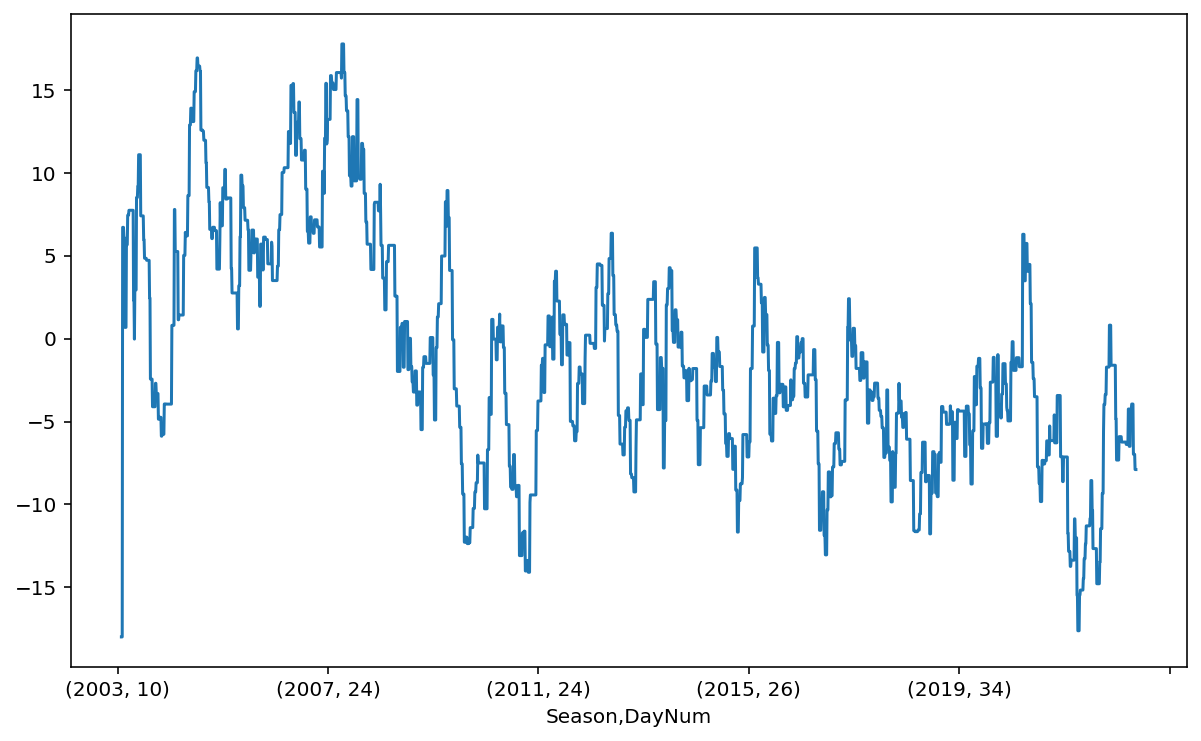

In [60]:
box["Score_diff"].unstack("TeamID").ewm(halflife=20).mean().iloc[:, 1].plot()

In [61]:
box_stats = box.apply(lambda s: s.unstack("TeamID").ewm(halflife=15).mean().stack())

box_stats_before_tourney = (
    box_stats.query("DayNum < 133")
    .reorder_levels(["Season", "TeamID", "DayNum"])
    .sort_index()
    .groupby(["Season", "TeamID"])
    .last()
)

In [62]:
box_stats_before_tourney

stat              NumOT        Ast       Blk         DR        FGA       FGA3  \
Season TeamID                                                                   
2003   1102    0.000000  10.197591  1.172373  16.928183  38.631774  17.232955   
       1103    0.163761  15.605997  2.700351  19.516943  53.320648  18.602820   
       1104    0.012186  11.131681  3.001952  22.610114  57.236340  19.401064   
       1105    0.115010  16.113920  2.232219  23.913812  63.833032  21.145009   
       1106    0.001984  10.281666  2.660942  23.247805  52.810403  17.314083   
...                 ...        ...       ...        ...        ...        ...   
2022   1468    0.081710  14.067400  1.959245  22.199006  55.407783  22.195827   
       1469    0.000000  13.621154  2.572083  24.151072  58.696087  22.276310   
       1470    0.048700  11.246106  1.911038  19.648427  55.178706  17.027515   
       1471    0.030331  12.801691  1.364965  19.272854  53.321956  24.401033   
       1472    0.000000   9.452213  1.185601  18.588368  59.784939  26.004856   

stat                 FGM      FGM3        FTA        FTM  ...  FGM3_diff  \
Season TeamID                                             ...              
2003   1102    18.118724  5.300392  17.904894  12.563236  ...   0.297422   
       1103    26.621628  6.572792  21.134745  15.534264  ...   0.273030   
       1104    24.892457  6.928873  18.998422  13.641088  ...  -0.851415   
       1105    25.518841  8.548007  22.754320  15.330038  ...   2.897750   
       1106    22.224367  5.433921  17.963032  11.683334  ...   1.202473   
...                  ...       ...        ...        ...  ...        ...   
2022   1468    25.226080  7.496827  13.160242  10.233070  ...  -2.083935   
       1469    22.435526  5.684631  23.141278  15.844816  ...  -1.552415   
       1470    22.954754  5.812174  20.541198  15.104414  ...  -1.777652   
       1471    22.677438  8.174553  18.058814  13.712962  ...   1.456467   
       1472    25.093988  7.841382  12.321050   9.992957  ...  -2.379951   

stat           FTA_diff  FTM_diff   OR_diff   PF_diff  Score_diff  Stl_diff  \
Season TeamID                                                                 
2003   1102   -2.798855 -2.087372 -4.060981  0.889677   -4.243015  0.511871   
       1103    2.384898  1.838021 -2.811738 -2.192160    0.930182  0.250055   
       1104    2.230158  1.763406  3.670983  0.038293    1.742363  0.008730   
       1105   -1.297113 -1.495074  0.505186  0.424143   -1.230715 -0.256799   
       1106   -4.504196 -3.935694  0.026100  0.882217   -0.802141 -0.372335   
...                 ...       ...       ...       ...         ...       ...   
2022   1468   -1.409912  0.680924 -3.015876 -1.359331    2.295423  0.384501   
       1469    5.832936  3.432124  0.755959 -1.312715   -7.656223 -1.387326   
       1470    1.570032  2.280606 -1.070370 -1.164454    0.284757  3.015554   
       1471    6.254349  5.101524 -4.240750 -3.739187   -8.569758 -0.818159   
       1472   -3.153979 -2.121712 -2.963078  1.906327  -14.419916  1.475345   

stat            TO_diff  home_handicap_diff  win_diff  
Season TeamID                                          
2003   1102   -0.470016            0.047140 -0.497836  
       1103   -1.287029            0.109832 -0.028712  
       1104    0.158564            0.205671 -0.164855  
       1105   -2.815360           -0.430877 -0.537127  
       1106    1.957145           -0.105951 -0.194618  
...                 ...                 ...       ...  
2022   1468   -3.985596            0.582737  0.088262  
       1469    2.117929           -0.954775 -0.178832  
       1470   -4.557647           -0.209657  0.186505  
       1471   -0.210519           -0.566835 -0.296210  
       1472   -2.133785           -0.849603 -0.845179  

[6965 rows x 35 columns]

In [63]:
full_sub = join_last_ranks(last_ranks_ewms["mean"], submission_ids_full, power=0.9)
baseline_ewma_with_score = full_sub.set_index("ID").join(
    scoring_df["truth"], how="inner"
)

baseline_ewma_with_score

,Season,Team2,Team1,rank1,rank2,Pred,truth
ID,,,,,,,
2003_1140_1163,2003,1163,1140,25.199145,36.149027,0.580483,0
2003_1141_1166,2003,1166,1141,61.989170,21.975934,0.282254,1
2003_1141_1181,2003,1181,1141,61.989170,11.310737,0.177835,0
2003_1161_1181,2003,1181,1161,111.608604,11.310737,0.113014,0
2003_1112_1211,2003,1211,1112,1.886494,39.998760,0.939841,1
...,...,...,...,...,...,...,...
2021_1393_1452,2021,1452,1393,52.353410,18.647833,0.283116,1
2021_1179_1455,2021,1455,1179,66.755270,59.636950,0.474651,1
2021_1437_1457,2021,1457,1437,13.000650,88.701349,0.849188,1


In [64]:
all_features_before_tourney = (
    baseline_ewma_with_score.reset_index()
    #     .drop("truth", axis=1)
    .set_index(["Season", "Team1", "Team2"])
    .join(
        box_stats_before_tourney.reset_index()
        .rename(dict(TeamID="Team1"), axis=1)
        .set_index(["Season", "Team1"]),
        rsuffix="_1",
    )
    .join(
        box_stats_before_tourney.reset_index()
        .rename(dict(TeamID="Team2"), axis=1)
        .set_index(["Season", "Team2"]),
        rsuffix="_2",
    )
    .reorder_levels(["Season", "Team1", "Team2"])
    .sort_index()
    .rename(dict(Pred="raw_pred"), axis=1)
)

In [65]:
all_features_before_tourney

ID       rank1       rank2  raw_pred  truth  \
Season Team1 Team2                                                            
2003   1104  1231   2003_1104_1231   33.670696   41.149686  0.545010      0   
       1112  1211   2003_1112_1211    1.886494   39.998760  0.939841      1   
             1242   2003_1112_1242    1.886494    9.053487  0.804016      0   
             1323   2003_1112_1323    1.886494   14.271377  0.860708      1   
             1436   2003_1112_1436    1.886494  164.283749  0.982367      1   
...                            ...         ...         ...       ...    ...   
2021   1333  1397   2021_1333_1397  107.064777   24.454593  0.209332      1   
       1361  1393   2021_1361_1393   24.357288   52.353410  0.665670      0   
       1393  1452   2021_1393_1452   52.353410   18.647833  0.283116      1   
       1403  1429   2021_1403_1429   23.345668   58.472440  0.695578      1   
       1437  1457   2021_1437_1457   13.000650   88.701349  0.849188      1   

                       NumOT        Ast       Blk         DR        FGA  ...  \
Season Team1 Team2                                                       ...   
2003   1104  1231   0.012186  11.131681  3.001952  22.610114  57.236340  ...   
       1112  1211   0.198338  17.581248  4.181488  27.050819  67.358605  ...   
             1242   0.198338  17.581248  4.181488  27.050819  67.358605  ...   
             1323   0.198338  17.581248  4.181488  27.050819  67.358605  ...   
             1436   0.198338  17.581248  4.181488  27.050819  67.358605  ...   
...                      ...        ...       ...        ...        ...  ...   
2021   1333  1397   0.116742  13.633039  2.499830  20.658147  54.509752  ...   
       1361  1393   0.072151  12.050341  2.675951  23.465355  55.909815  ...   
       1393  1452   0.004738  14.604655  5.014341  21.111248  60.514509  ...   
       1403  1429   0.082821  13.543808  3.747897  20.647437  56.345399  ...   
       1437  1457   0.001731  14.156741  1.238308  23.646339  57.281765  ...   

                    FGM3_diff_2  FTA_diff_2  FTM_diff_2  OR_diff_2  PF_diff_2  \
Season Team1 Team2                                                              
2003   1104  1231      1.844460    5.848065    4.212814  -0.632831  -2.468729   
       1112  1211     -0.204551    1.665221    1.744873   2.286992   0.448575   
             1242     -1.664431    5.124991    2.472919   2.612699  -0.616761   
             1323      1.740249    6.699628    6.069270  -1.609422  -3.626190   
             1436     -1.795898    3.680666    2.467763   2.932062  -1.497428   
...                         ...         ...         ...        ...        ...   
2021   1333  1397     -0.227064   -1.590645   -1.330501   0.263892  -0.234807   
       1361  1393      0.212401   -0.199956   -0.009756  -1.559082   0.406081   
       1393  1452      0.111540    7.698829    6.777671   0.660261  -2.958275   
       1403  1429     -0.533772    2.114287    1.491385   3.539374  -3.073014   
       1437  1457      3.317903    1.827101    3.864608   4.719338  -1.608469   

                    Score_diff_2  Stl_diff_2  TO_diff_2  home_handicap_diff_2  \
Season Team1 Team2                                                              
2003   1104  1231       2.610012   -1.949344   0.951043             -0.227915   
       1112  1211       7.653024    1.560586  -2.022161             -0.443097   
             1242      11.014767    2.958394  -0.037576              0.077387   
             1323       0.471962   -0.338832   1.941177              0.032759   
             1436       7.524557   -0.418334   1.981182              0.126869   
...                          ...         ...        ...                   ...   
2021   1333  1397       4.057181   -0.194282  -1.261146             -0.217199   
       1361  1393       3.315488    2.202194  -3.444641              0.346591   
       1393  1452       3.524528    3.096756  -3.594175              0.213396   
       1403  1429 

0.5469


,logloss
season,
2003,-0.539455
2004,-0.575336
2005,-0.529518
2006,-0.591691
2007,-0.455762
2008,-0.493871
2009,-0.477586
2010,-0.551837
2011,-0.690337


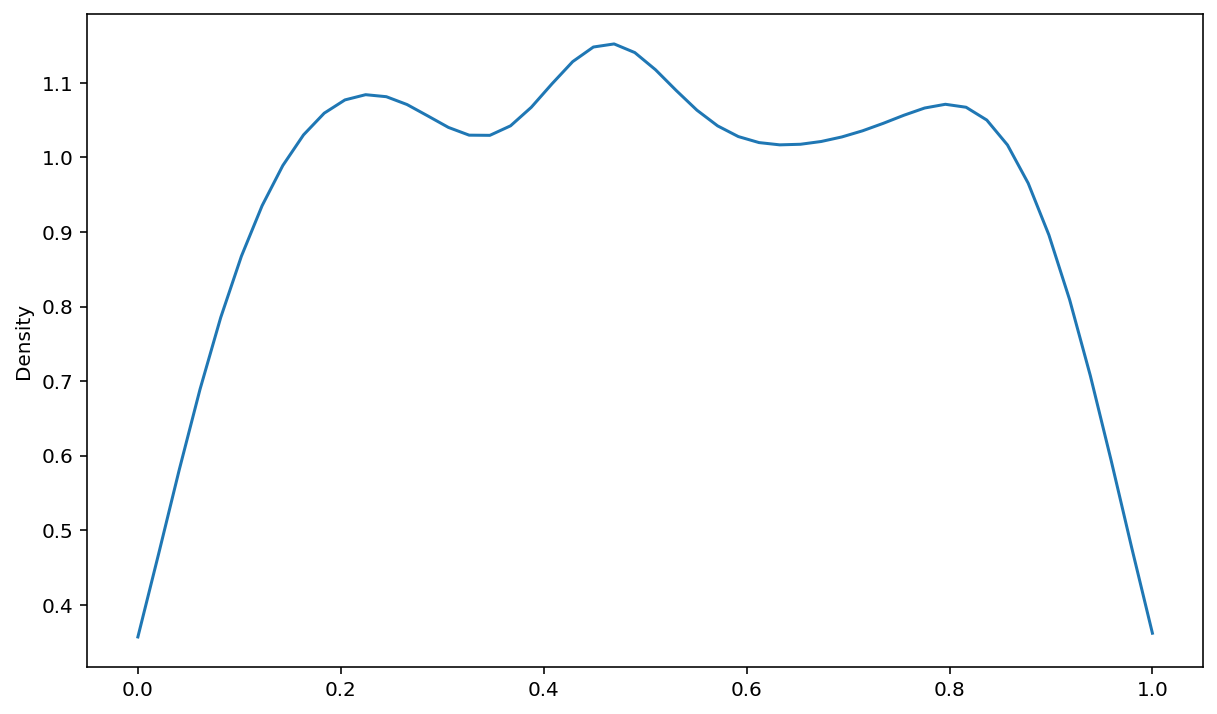

In [66]:
baseline_ewma_with_score["Pred"].plot.kde(ind=np.linspace(0, 1, 50))
print(
    score(
        baseline_ewma_with_score.reset_index().drop("truth", axis=1), scoring_df
    ).round(4)
)
score_by_season(
    baseline_ewma_with_score.reset_index().drop("truth", axis=1), scoring_df
).style.background_gradient()

In [67]:
all_features_before_tourney.columns

Index(['ID', 'rank1', 'rank2', 'raw_pred', 'truth', 'NumOT', 'Ast', 'Blk',
       'DR', 'FGA', 'FGA3', 'FGM', 'FGM3', 'FTA', 'FTM', 'OR', 'PF', 'Score',
       'Stl', 'TO', 'home_handicap', 'win', 'game_no', 'NumOT_diff',
       'Ast_diff', 'Blk_diff', 'DR_diff', 'FGA_diff', 'FGA3_diff', 'FGM_diff',
       'FGM3_diff', 'FTA_diff', 'FTM_diff', 'OR_diff', 'PF_diff', 'Score_diff',
       'Stl_diff', 'TO_diff', 'home_handicap_diff', 'win_diff', 'NumOT_2',
       'Ast_2', 'Blk_2', 'DR_2', 'FGA_2', 'FGA3_2', 'FGM_2', 'FGM3_2', 'FTA_2',
       'FTM_2', 'OR_2', 'PF_2', 'Score_2', 'Stl_2', 'TO_2', 'home_handicap_2',
       'win_2', 'game_no_2', 'NumOT_diff_2', 'Ast_diff_2', 'Blk_diff_2',
       'DR_diff_2', 'FGA_diff_2', 'FGA3_diff_2', 'FGM_diff_2', 'FGM3_diff_2',
       'FTA_diff_2', 'FTM_diff_2', 'OR_diff_2', 'PF_diff_2', 'Score_diff_2',
       'Stl_diff_2', 'TO_diff_2', 'home_handicap_diff_2', 'win_diff_2'],
      dtype='object')

In [68]:
# feature_names = ["ScoreDiff", "ScoreDiff_2", "win", "win_2", "rank1", "rank2"]

feature_names = all_features_before_tourney.columns.difference(
    {"ID", "truth", 
#      "rank1", "rank2", 
     "raw_pred"
    }
).tolist()  # + ["rank1_pow09", "rank2_pow09"]

dataset = (
    all_features_before_tourney.set_index("ID", append=True)
    #     .assign(
    #         rank1_pow09=lambda f: f["rank1"].pow(0.9),
    #         rank2_pow09=lambda f: f["rank2"].pow(0.9),
    #     )
    #     .drop(["Slot"], axis=1)
    #     .join(scoring_df)
    .loc[:, feature_names + ["truth"]]
    .astype(float)
    .fillna(np.nan)
    #     .fillna(dict(truth=0.5))
    .dropna(subset="truth")
)
dataset

Ast      Ast_2  Ast_diff  Ast_diff_2  \
Season Team1 Team2 ID                                                           
2003   1104  1231  2003_1104_1231  11.131681  14.281315 -1.867283    0.870124   
       1112  1211  2003_1112_1211  17.581248  14.153329  2.965199    2.194474   
             1242  2003_1112_1242  17.581248  14.209873  2.965199    3.312489   
             1323  2003_1112_1323  17.581248  17.362998  2.965199    0.509216   
             1436  2003_1112_1436  17.581248  14.421529  2.965199    2.337157   
...                                      ...        ...       ...         ...   
2021   1333  1397  2021_1333_1397  13.633039  15.104025  1.624156    5.767075   
       1361  1393  2021_1361_1393  12.050341  14.604655  0.847782   -3.149814   
       1393  1452  2021_1393_1452  14.604655  13.370935 -3.149814   -0.661339   
       1403  1429  2021_1403_1429  13.543808  16.252859  1.860951    6.040596   
       1437  1457  2021_1437_1457  14.156741  15.306041  2.107662    6.607674   

                                        Blk     Blk_2  Blk_diff  Blk_diff_2  \
Season Team1 Team2 ID                                                         
2003   1104  1231  2003_1104_1231  3.001952  4.845305 -0.795191    2.023588   
       1112  1211  2003_1112_1211  4.181488  3.915112  1.961945    1.845760   
             1242  2003_1112_1242  4.181488  5.329483  1.961945    1.118833   
             1323  2003_1112_1323  4.181488  4.738903  1.961945   -0.203212   
             1436  2003_1112_1436  4.181488  2.505092  1.961945   -0.548143   
...                                     ...       ...       ...         ...   
2021   1333  1397  2021_1333_1397  2.499830  5.674760 -0.045780    2.371566   
       1361  1393  2021_1361_1393  2.675951  5.014341 -0.137266    1.490439   
       1393  1452  2021_1393_1452  5.014341  3.309525  1.490439    0.402179   
       1403  1429  2021_1403_1429  3.747897  5.348830  0.618898    1.906288   
       1437  1457  2021_1437_1457  1.238308  2.108484 -1.402215   -1.484083   

                                          DR       DR_2  ...  home_handicap_2  \
Season Team1 Team2 ID                                    ...                    
2003   1104  1231  2003_1104_1231  22.610114  23.250721  ...        -0.019281   
       1112  1211  2003_1112_1211  27.050819  24.123425  ...        -0.223477   
             1242  2003_1112_1242  27.050819  26.970375  ...        -0.003549   
             1323  2003_1112_1323  27.050819  24.650700  ...        -0.001683   
             1436  2003_1112_1436  27.050819  25.973108  ...         0.101168   
...                                      ...        ...  ...              ...   
2021   1333  1397  2021_1333_1397  20.658147  23.309562  ...         0.036283   
       1361  1393  2021_1361_1393  23.465355  21.111248  ...         0.447334   
       1393  1452  2021_1393_1452  21.111248  20.464209  ...        -0.253058   
       1403  1429  2021_1403_1429  20.647437  26.871088  ...         0.097442   
       1437  1457  2021_1437_1457  23.646339  27.397396  ...         0.260313   

                                   home_handicap_diff  home_handicap_diff_2  \
Season Team1 Team2 ID                                                         
2003   1104  1231  2003_1104_1231            0.205671             -0.227915   
       1112  1211  2003_1112_1211            0.298816             -0.443097   
             1242  2003_1112_1242            0.298816              0.077387   
             1323  2003_1112_1323            0.298816              0.032759   
             1436  2003_1112_1436            0.298816              0.126869   
...                                               ...                   ...   
2021   1333  1397  2021_1333_1397           -0.050016             -0.217199   
       1361  1393  2021_1361_1393            0.255070              0.346591   
       1393  1452  2021_1393_1452            0.346591              0.213396   
       1403  1429  2021_1403_1429   

In [69]:
%%time
from sklearn.ensemble import (
    BaggingClassifier,
    HistGradientBoostingClassifier,
    HistGradientBoostingRegressor,
)
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.svm import SVC, LinearSVC

cat_features = [name in ("rnd", "team1_favourite") for name in feature_names]
monotonic_cst = [
    1
    if name in ("rank2", "rank2_pow09", "raw_pred", "win", "pred_win")
    else (-1 if name in ("rank1", "rank1_pow09", "win2") else 0)
    for name in feature_names
]
pivot_year = "2016"
data_tr = dataset.query("ID < @pivot_year")
data_val = dataset.query("ID >= @pivot_year")

# clf = HistGradientBoostingRegressor()
# clf = HistGradientBoostingClassifier(
#     max_iter=100,
#     min_samples_leaf=20,
#     learning_rate=0.025,
#     max_depth=5,
#     categorical_features=cat_features,
#     monotonic_cst=monotonic_cst,
#     l2_regularization=10.0,
#     validation_fraction=0.1,
# )
# clf = SVC(C=0.5, kernel="linear", probability=True)
# clf = LinearRegression()
clf = LogisticRegression(C=1, penalty="l2")
pipe = make_pipeline(
    StandardScaler(),
    #     BaggingClassifier(
    #         clf, max_samples=0.5, max_features=0.5, oob_score=True, n_estimators=100
    #     ),
    clf,
)
# pipe = clf
search = RandomizedSearchCV(
    clf,
    dict(
        max_iter=[10, 50, 100, 150, 200],
        min_samples_leaf=[5, 10, 20, 30, 40, 50],
        max_depth=[2, 4, 6, 8, 10, 12],
        learning_rate=[0.1, 0.025, 0.25, 0.05],
        max_leaf_nodes=[20, 31, 40, 50],
        #         l2_regularization=[5., 10., 15.]
    ),
    n_jobs=1,
    cv=TimeSeriesSplit(n_splits=data_tr.reset_index()["Season"].nunique()),
)

# search.fit(data_tr[feature_names], data_tr["truth"])

# pipe = search.best_estimator_
pipe.fit(data_tr[feature_names], data_tr["truth"])
pred = (
    pd.Series(pipe.predict_proba(data_val[feature_names])[:, 1], index=data_val.index)
    .rename("Pred")
    .reset_index()
    .merge(baseline_ewma_with_score["Pred"].rename("raw_pred"), on="ID")
    .rename(dict(Pred="gbm_pred"), axis=1)
    .assign(Pred=lambda f: f["gbm_pred"].add(f["raw_pred"]).div(2))
)

pred_train = (
    pd.Series(pipe.predict_proba(data_tr[feature_names])[:, 1], index=data_tr.index)
    .rename("Pred")
    .reset_index()
)

print(score(pred_train, scoring_df).round(4))
print(
    score(
        pred.drop("Pred", axis=1).merge(baseline_ewma_with_score["Pred"], on="ID"),
        scoring_df,
    ).round(4)
)
print(score(pred, scoring_df).round(4))
print(
    score(
        pred.drop("Pred", axis=1).rename(dict(gbm_pred="Pred"), axis=1), scoring_df
    ).round(4)
)
score_by_season(
    pred,
    scoring_df,
).style.background_gradient()

0.515
0.5413
0.5625
0.6301
CPU times: user 316 ms, sys: 426 ms, total: 742 ms
Wall time: 240 ms


/home/horace/mambaforge/envs/march22/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,logloss
season,
2016,-0.563406
2017,-0.508854
2018,-0.586362
2019,-0.510691
2021,-0.644550


In [70]:
score_by_season(pred_train, scoring_df).style.background_gradient()

,logloss
season,
2003,-0.492095
2004,-0.584611
2005,-0.502124
2006,-0.492618
2007,-0.425562
2008,-0.452682
2009,-0.489943
2010,-0.541612
2011,-0.540132


In [71]:
search.best_params_

AttributeError: 'RandomizedSearchCV' object has no attribute 'best_params_'

In [ ]:
from sklearn.inspection import permutation_importance

r = permutation_importance(
    pipe, data_val[feature_names], data_val["truth"], n_repeats=30, random_state=0
)

for i in r.importances_mean.argsort()[::-1]:
    if r.importances_mean[i] - 2 * r.importances_std[i] > 0:
        print(
            f"{feature_names[i]:<14}"
            f"{r.importances_mean[i]:.3f}"
            f" +/- {r.importances_std[i]:.3f}"
        )